## 2D/3D-Tensors

A 2D tensor can be considered as a container that holds the numerical values of same type. Let us consider a dataset. We can represent it using 2D-Tensor.

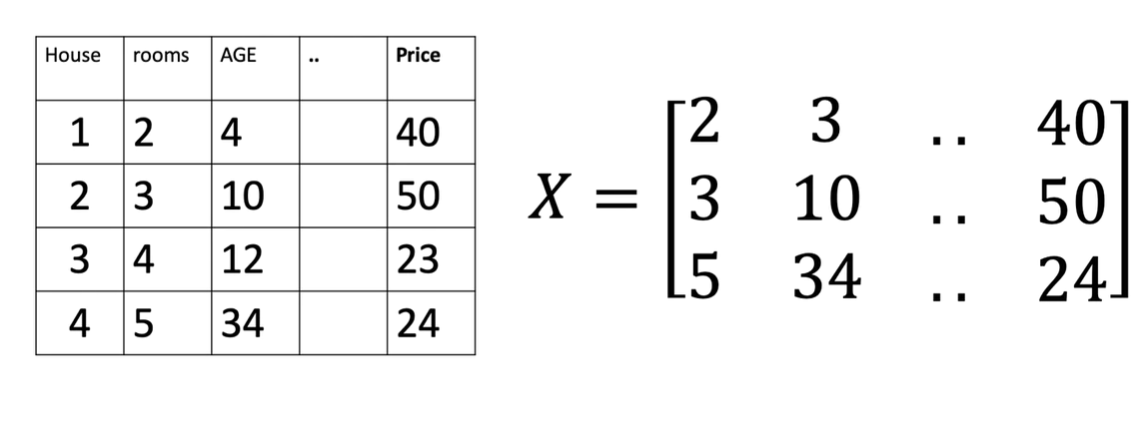

In 2D, tensors are basically matrices. We can also represent grayscale images as 2D tensors.

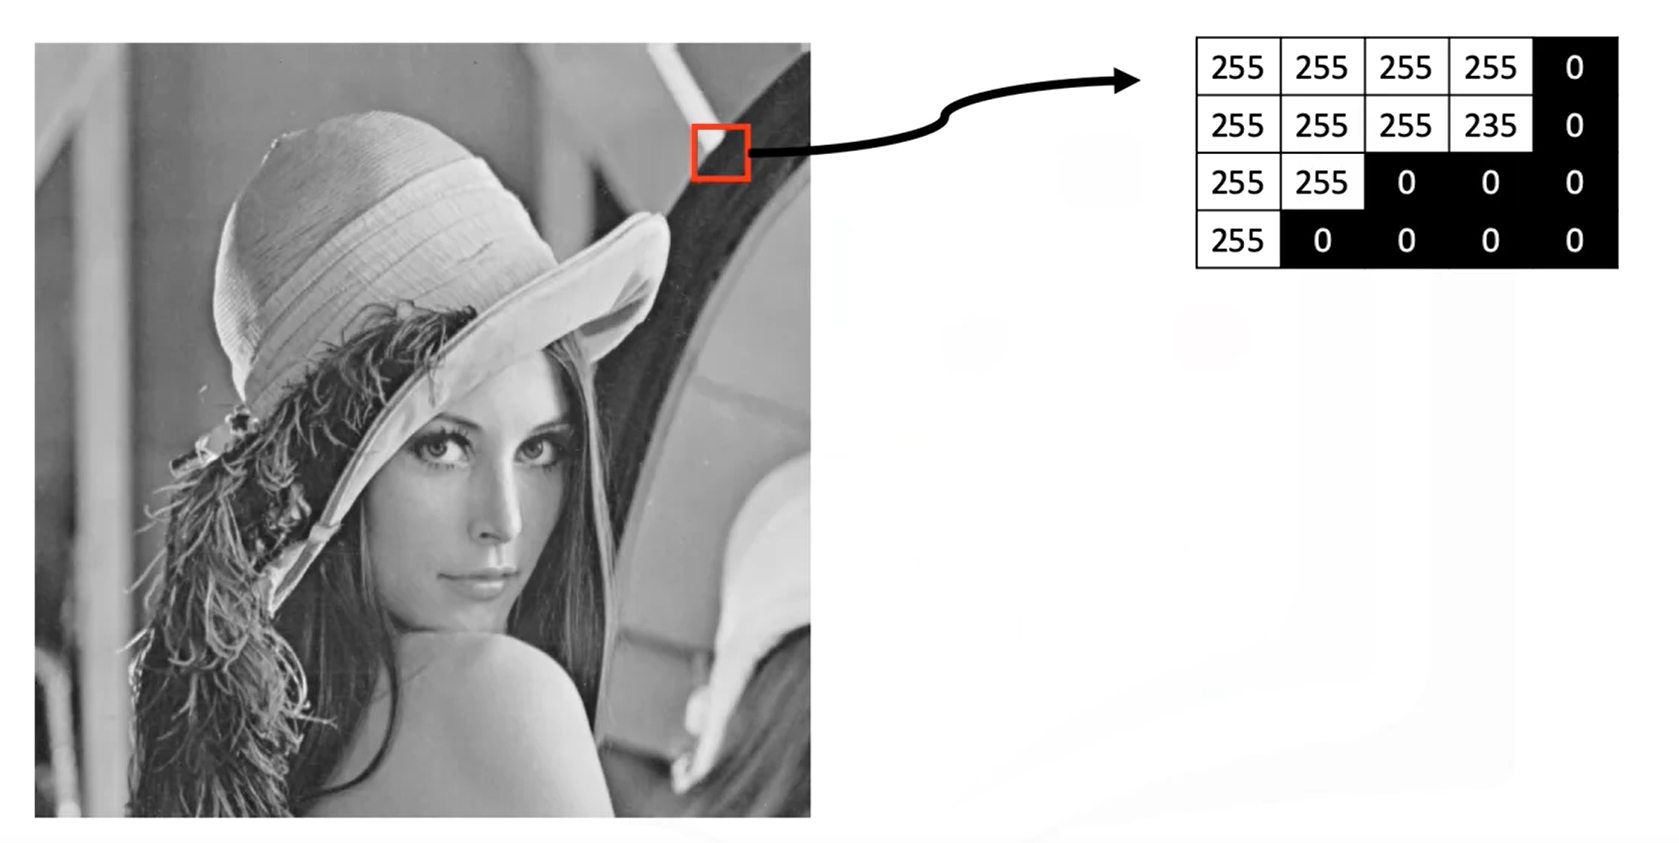

Here, the image intensity values can be represented as values between 0 & 255. These numerical values are stored as a grid using tensors as shown below:
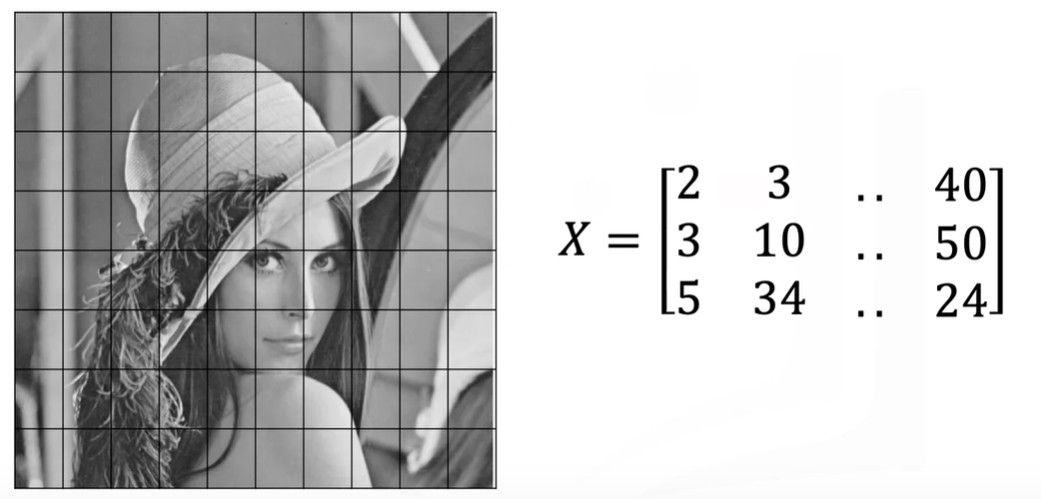

Tensors can be extended to any number of Dimensions.
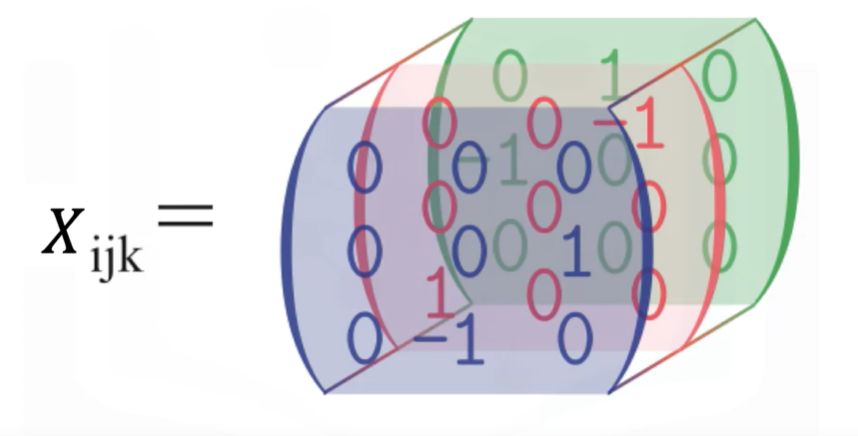

3D tensors are basically combination of three one dimensional tensors.
Consider a color image composed of 3 color components: red, green & blue. Like a greyscale image, each component is made up of different intensity values that can be represented as tensor values between 0 & 255.
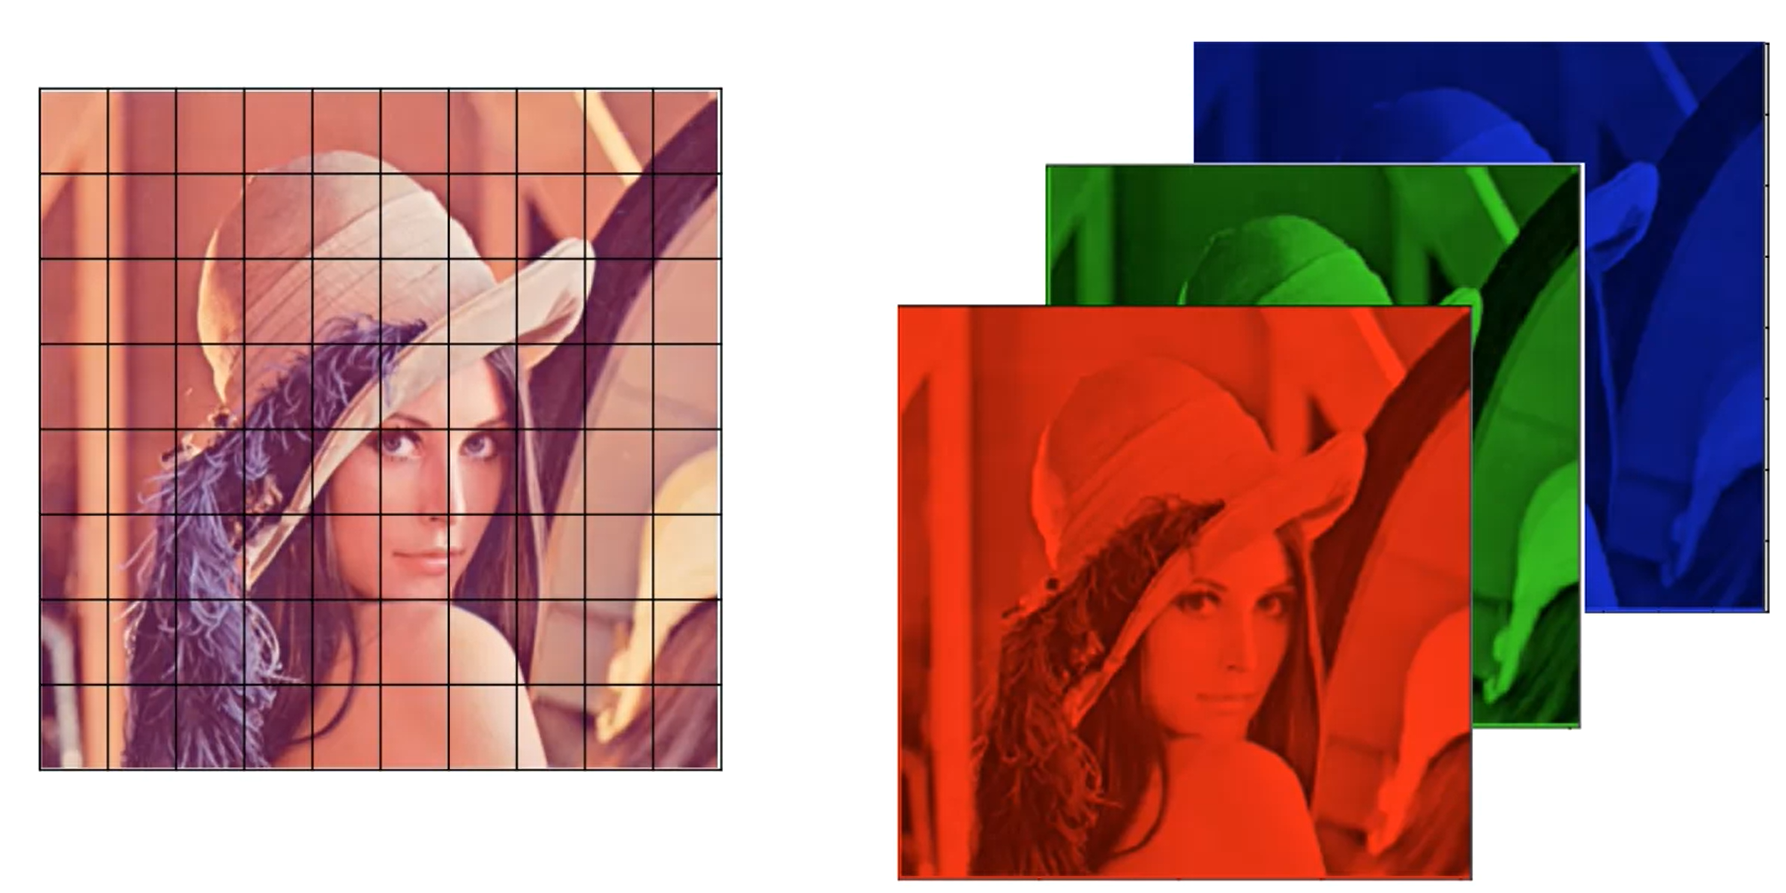

In [1]:
#Import Torch, Numpy, matplotlib and Pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import torch

Let's create a 2D tensor. Consider the list "a".

In [2]:
#Create a list consisting a nested list of equal size.
a = [[11, 12, 13], [21, 22, 23], [31, 32, 33]]

#Cast the list to a torch tensor
A = torch.tensor(a)

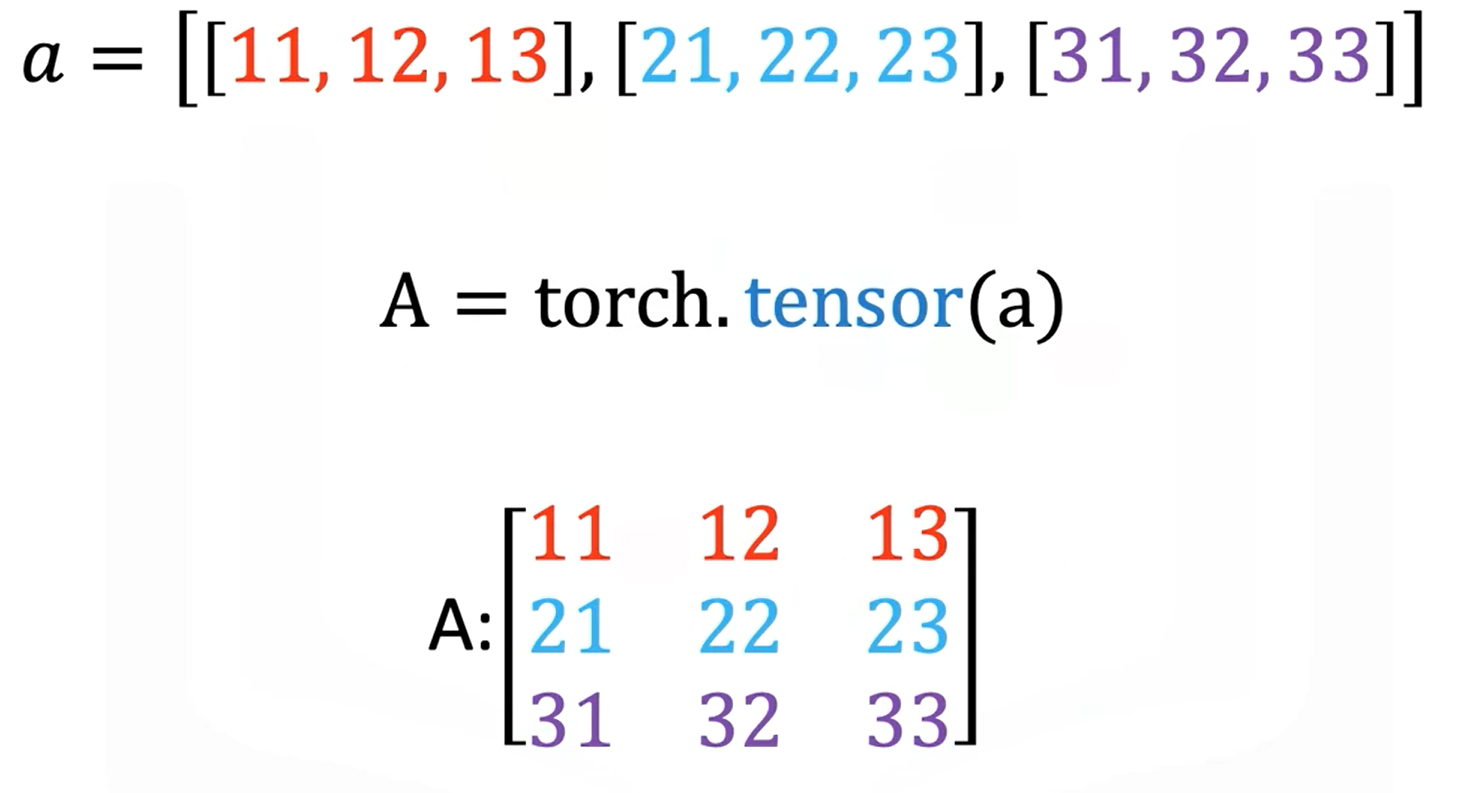

In [3]:
#Check the dimension of A
print(A.ndimension())

2


In [4]:
#Check the shape
print(A.shape)

torch.Size([3, 3])


In [5]:
#Get the number of elements in the tensor
print(A.numel())

9


### Indexing and Slicing Tensors in 2D

In [6]:
#Indexing and selecting specific elements
p = A[1][2]

In [7]:
print(p)

print(type(p))

tensor(23)
<class 'torch.Tensor'>


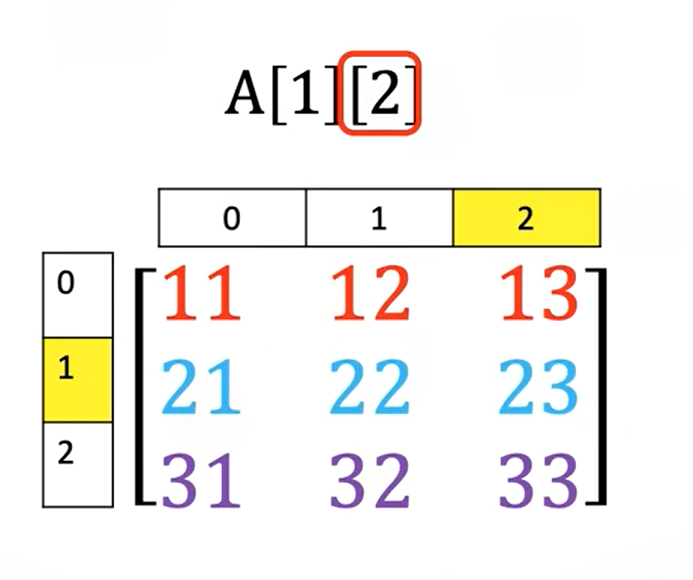

In [8]:
#Slicing and selecting elements
q = A[0, :2]

In [9]:
print(q)

print(type(q))

tensor([11, 12])
<class 'torch.Tensor'>


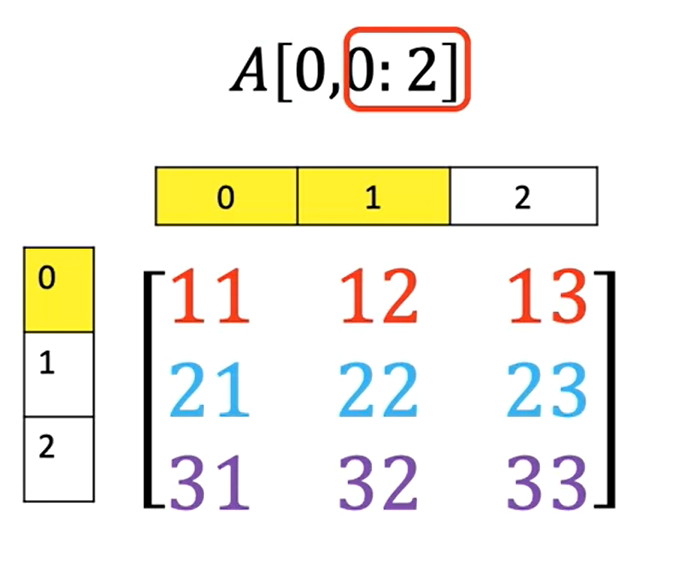

In [10]:
#Slicing and selecting elements
r = A[1:3, :2]

In [11]:
print(r)

print(type(r))

tensor([[21, 22],
        [31, 32]])
<class 'torch.Tensor'>


### Basic Tensor operations in 2D

Before performing any operations on tensors, we must check that tensors are of same type.

##### Adding

Adding 2D tensors is similar to adding matrices.

In [12]:
X = torch.tensor([[1, 0], [0, 1]])
Y = torch.tensor([[2, 1], [1, 2]])

In [13]:
print(X)

tensor([[1, 0],
        [0, 1]])


In [14]:
print(Y)

tensor([[2, 1],
        [1, 2]])


In [15]:
Z = X + Y

In [16]:
print(Z)

tensor([[3, 1],
        [1, 3]])


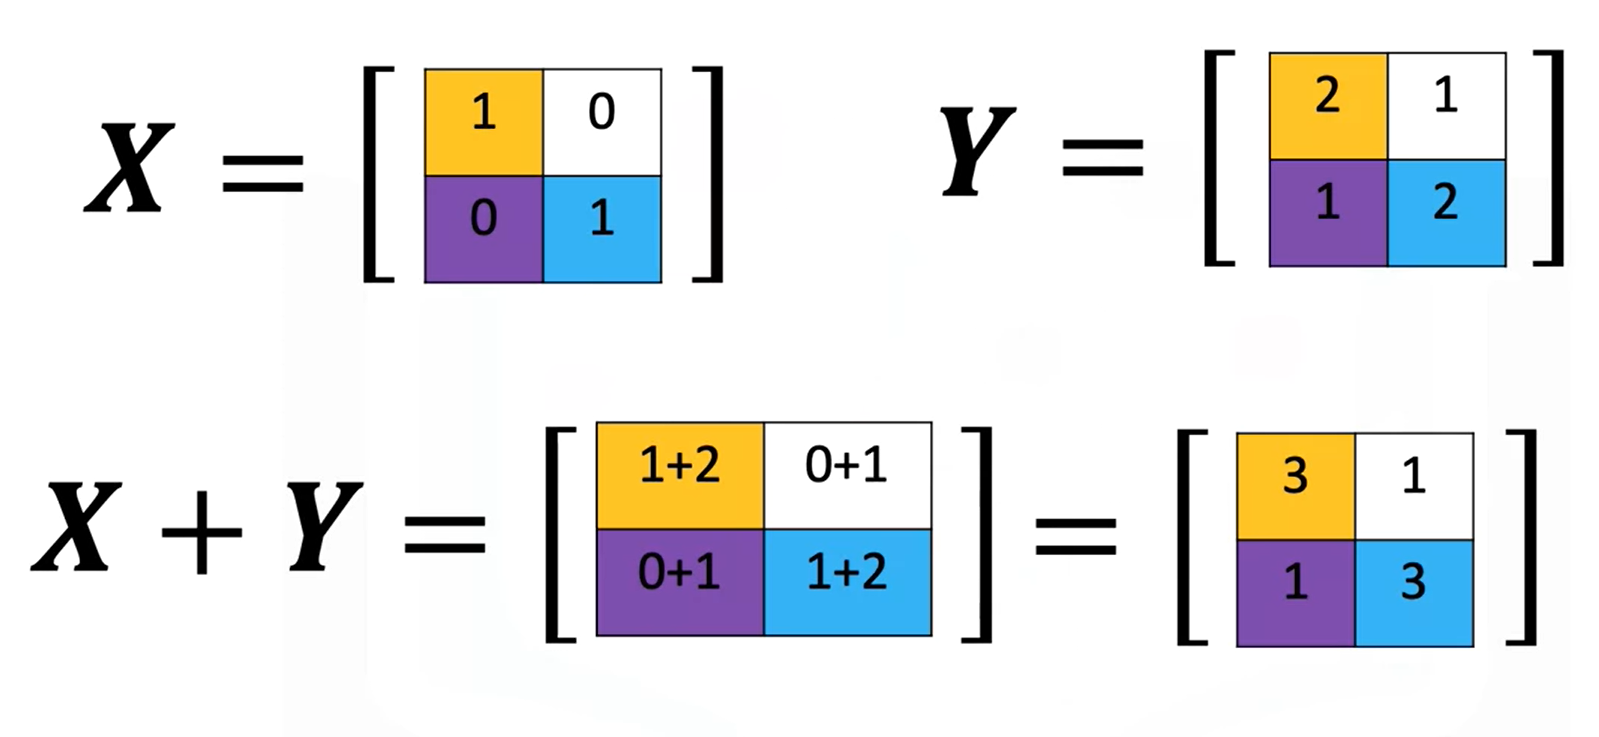

##### Multiplying Tensor with scalar

This is also equivalent to multiplying matrix with scalar. i.e. Each element of tensor is multiplied by that scalar.

In [17]:
Y

tensor([[2, 1],
        [1, 2]])

In [18]:
a = 2*Y

In [19]:
print(a)

tensor([[4, 2],
        [2, 4]])


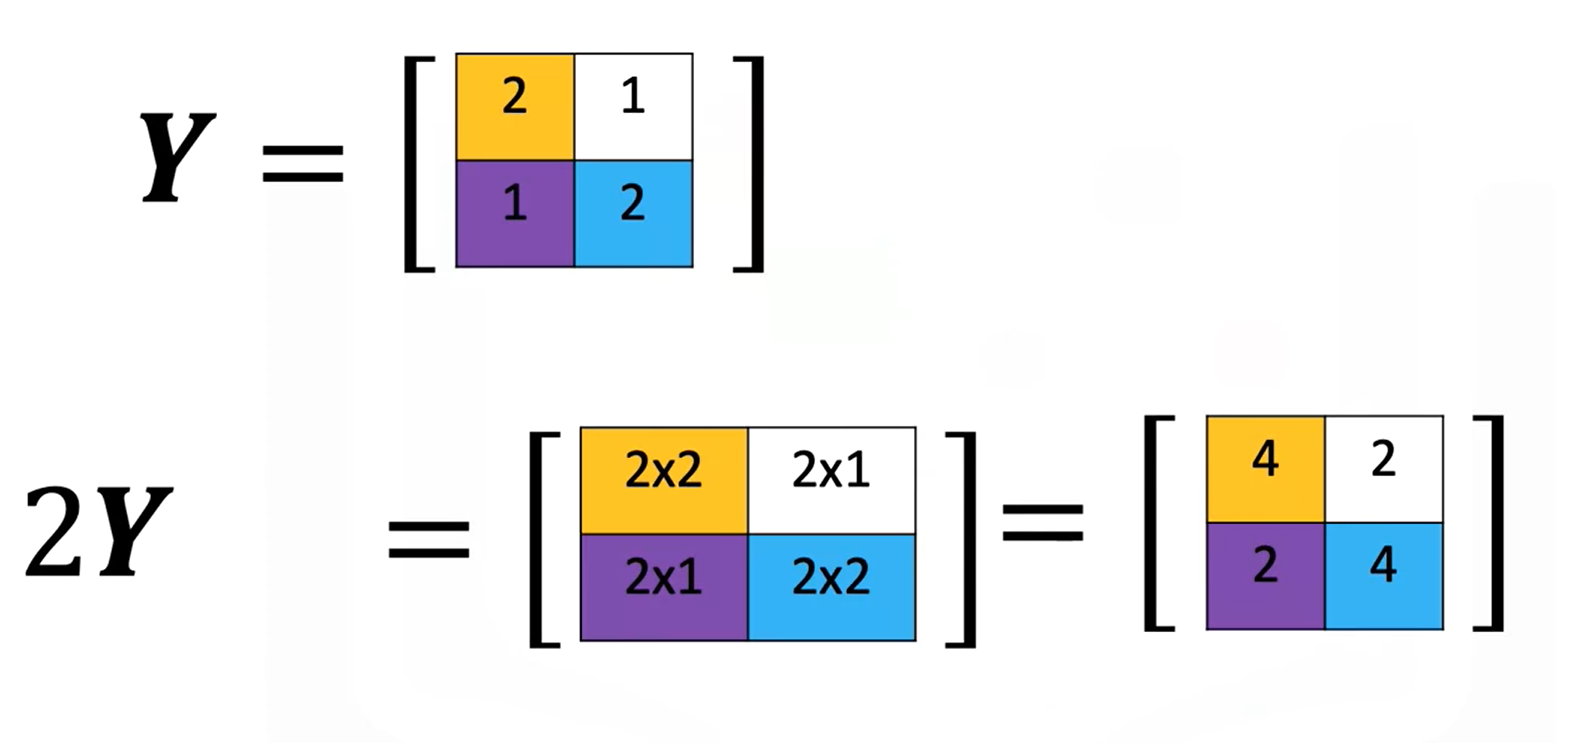

##### Multiplication of two Tensors

Multiplication of two tensors corresponds to element-wise multiplication.

In [20]:
X

tensor([[1, 0],
        [0, 1]])

In [21]:
Y

tensor([[2, 1],
        [1, 2]])

In [22]:
Z = X * Y

In [23]:
Z

tensor([[2, 0],
        [0, 2]])

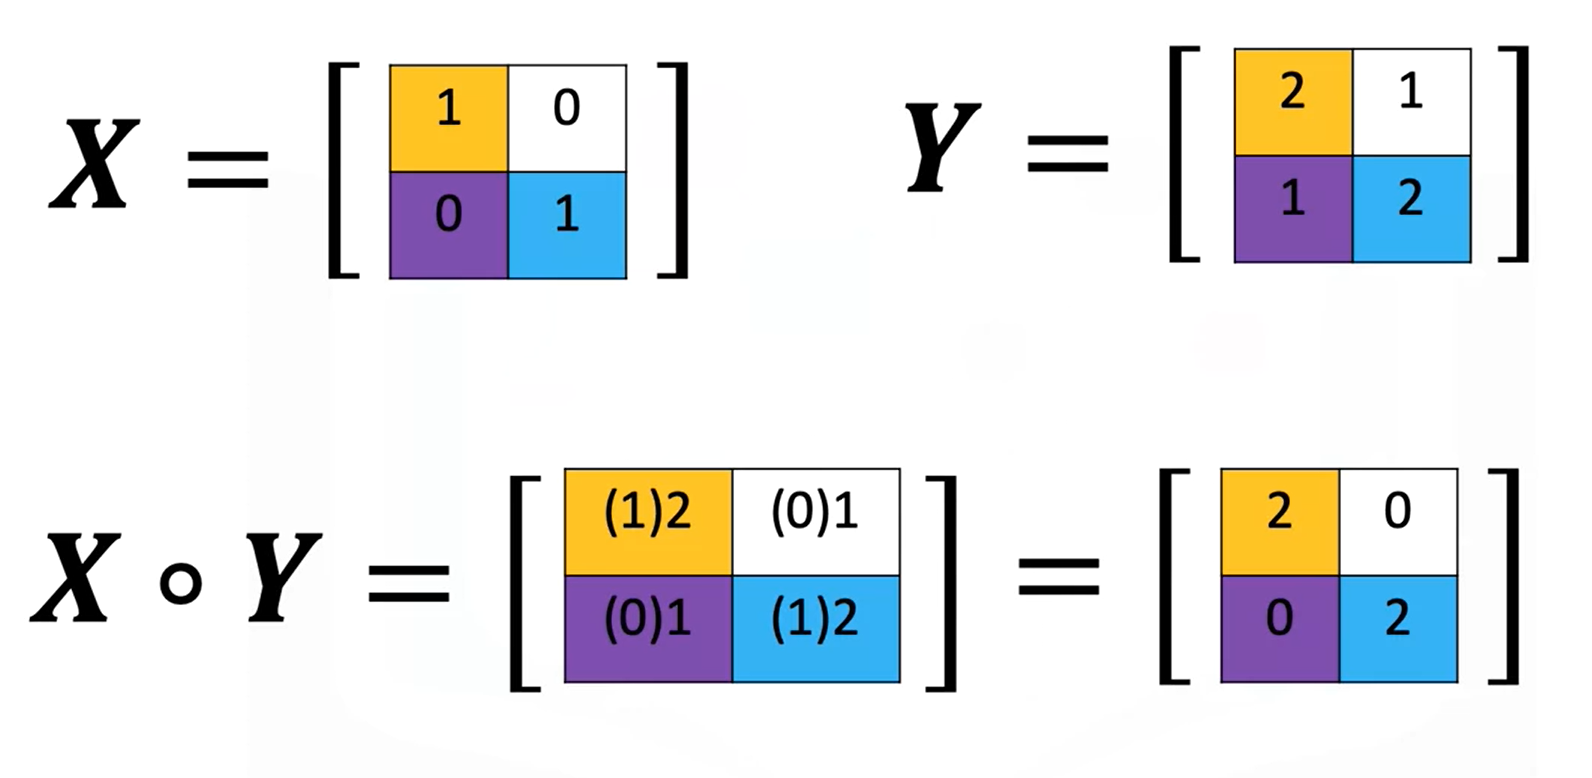

##### Matrix Multiplication with Tensors

In [24]:
A = torch.tensor([[0, 1, 1], [1, 0, 1]])
B = torch.tensor([[1, 1], [1, 1], [-1, 1]])

In [25]:
A

tensor([[0, 1, 1],
        [1, 0, 1]])

In [26]:
B

tensor([[ 1,  1],
        [ 1,  1],
        [-1,  1]])

In [27]:
#First Method
C = A.matmul(B)

In [28]:
C

tensor([[0, 2],
        [0, 2]])

In [29]:
#Second Method
D = torch.mm(A, B)

In [30]:
D

tensor([[0, 2],
        [0, 2]])

### Differentiation in PyTorch

Differentiation is used for generating parameters in Neural Networks.

In [31]:
#Create a new tensor
x = torch.tensor(2.0, requires_grad = True)

#Assign x^2 to y
y = x**2

print(y)

#Use ".backward()" function to calculate the derivative of the function "y"
y.backward()

#use ".grad" attribute in x to get the value of derivative of y when x = 2
x.grad

tensor(4., grad_fn=<PowBackward0>)


tensor(4.)

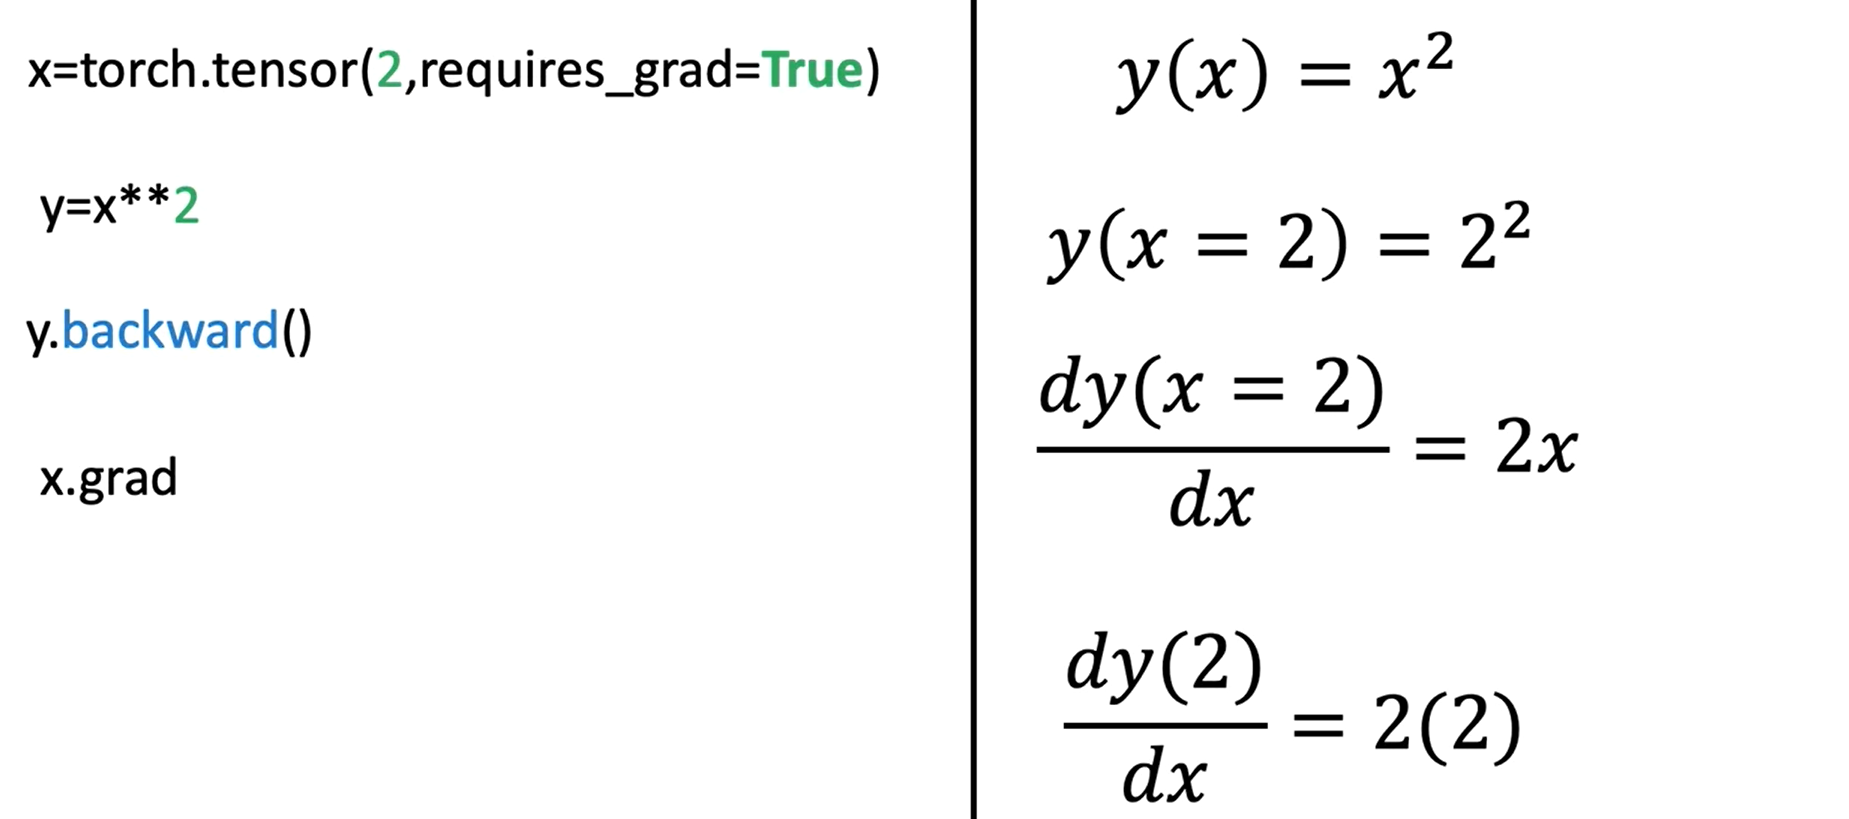

In [32]:
#let's try another example.

#Create a new tensor
x = torch.tensor(2.0, requires_grad = True)

#Assign x^2 to y
z = x**2 + 2*x + 1

print(z)

#Use ".backward()" function to calculate the derivative of the function "z"
z.backward()

#use ".grad" attribute in x to get the value of derivative of z when x = 2
x.grad

tensor(9., grad_fn=<AddBackward0>)


tensor(6.)

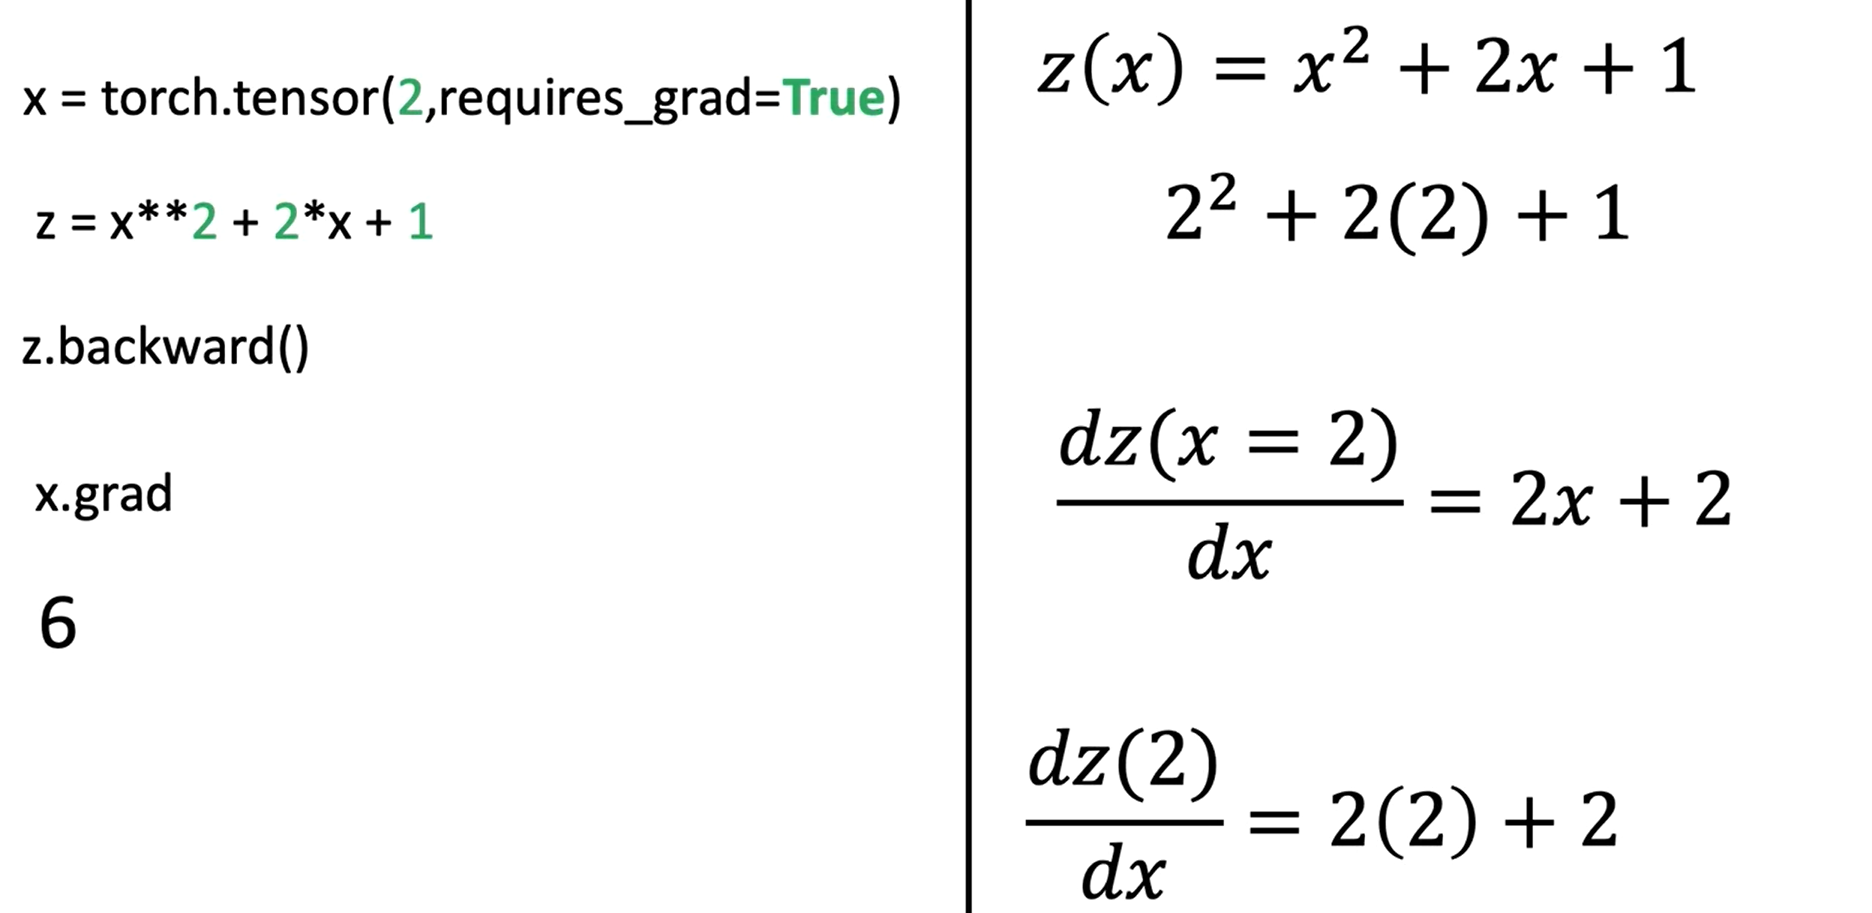

### Partial Derivatives

In [33]:
#Create two new tensors
u = torch.tensor(1.0, requires_grad = True)
v = torch.tensor(2.0, requires_grad = True)

#Assign x^2 to y
f = u*v + u**2

print(f)

#Use ".backward()" function to calculate the derivative of the function "f" with respect to both u and v
f.backward()

#use ".grad" attribute in u to get the value of derivative of f when u = 1
print(u.grad)

#use ".grad" attribute in v to get the value of derivative of f when u = 1
print(v.grad)

tensor(3., grad_fn=<AddBackward0>)
tensor(4.)
tensor(1.)


In [34]:
#More Examples
x = torch.tensor(1.0, requires_grad=True)
y = 2 * x ** 3 + x

print(y)

y.backward()
print("The derivative result: ", x.grad)

tensor(3., grad_fn=<AddBackward0>)
The derivative result:  tensor(7.)


 We can implement our own custom autograd Functions by subclassing
    torch.autograd.Function and implementing the forward and backward passes
    which operate on Tensors


In [35]:
class SQ(torch.autograd.Function):


    @staticmethod
    def forward(ctx,i):
        """
        In the forward pass we receive a Tensor containing the input and return
        a Tensor containing the output. ctx is a context object that can be used
        to stash information for backward computation. You can cache arbitrary
        objects for use in the backward pass using the ctx.save_for_backward method.
        """
        result=i**2
        ctx.save_for_backward(i)
        return result

    @staticmethod
    def backward(ctx, grad_output):
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
        """
        i, = ctx.saved_tensors
        grad_output = 2*i
        return grad_output

We can apply it as:

In [36]:
x=torch.tensor(2.0,requires_grad=True )
sq=SQ.apply

y=sq(x)
y
print(y.grad_fn)
y.backward()
x.grad

tensor(4.)

##Example##

Calculate the derivative with respect to a function with multiple values as follows. We can use the sum trick to produce a scalar valued function and then take the gradient: 

In [37]:
# Calculate the derivative with multiple values

x = torch.linspace(-10, 10, 10, requires_grad = True)
Y = x ** 2
y = torch.sum(x ** 2)

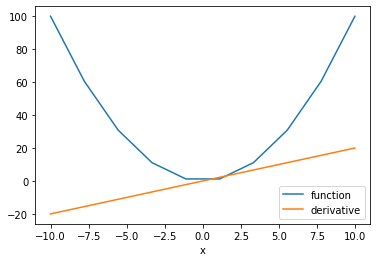

In [38]:
# Take the derivative with respect to multiple value. Plot out the function and its derivative

y.backward()

plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'function')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'derivative')
plt.xlabel('x')
plt.legend()
plt.show()

The orange line is the slope of the blue line at the intersection point, which is the derivative of the blue line.
